In [216]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [217]:
from modules import Preprocessing, EDA, FeatureEngineering, ModellingKMeans

In [218]:
#Importing Data
data = pd.read_excel("1673873388_rolling_stones_spotify (1).xlsx",index_col=0)

In [219]:
data.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [220]:
data.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


----------------------------------------------------------------------------------------

PREPROCESSING & Feature Engineering

In [221]:
df = data.copy()

In [222]:
df[["energy","acousticness"]] = MinMaxScaler().fit_transform(df[["energy","acousticness"]])


In [223]:
df[["energy","acousticness"]]

,energy,acousticness
0,0.993007,0.082889
1,0.960373,0.439633
2,0.965035,0.418506
3,0.983683,0.570419
4,0.965035,0.402409
...,...,...
1605,0.921911,0.157940
1606,0.658508,0.057939
1607,0.737762,0.373234
1608,0.472028,0.218303


In [224]:
eda = EDA(df)

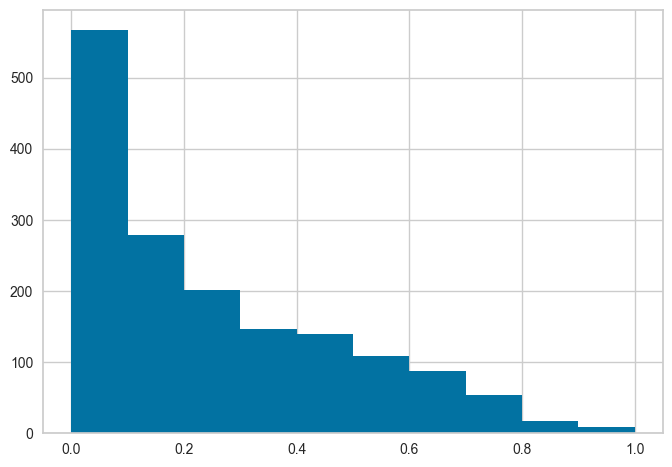

In [225]:
eda.histogram("acousticness");

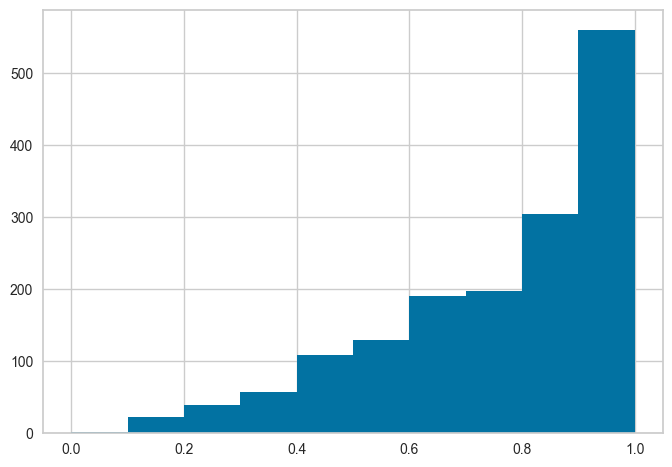

In [226]:
eda.histogram("energy");

By subtracting energy from acousticness to create an "acoustic_energy balance" feature, we can capture a new aspect of the music that can help differentiate songs from one another. A higher positive value for this feature would indicate that the song is more acoustic, while a lower negative value would indicate that the song is more energetic.

The acoustic_energy balance can be a useful feature in music analysis and recommendation systems, as it can provide a new way of understanding and categorizing songs. For example, a user who is in the mood for more relaxing and mellow music might prefer songs with a higher positive value for this feature, while a user who is looking for more upbeat and high-energy music might prefer songs with a lower negative value.

In [227]:
df["acoustic_energy_bal"]= df["acousticness"] - df["energy"]

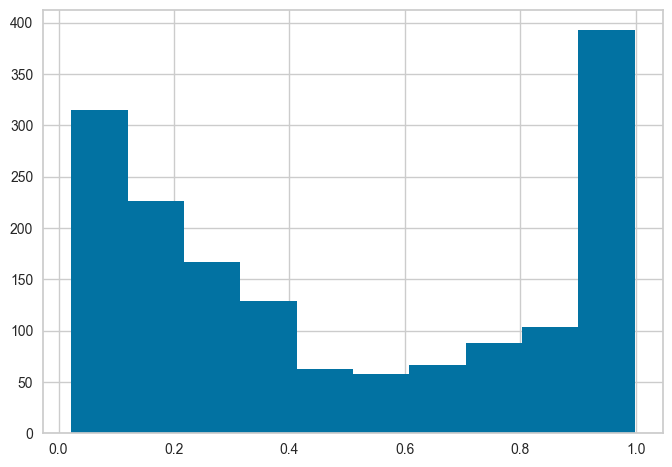

In [228]:
eda.histogram("liveness");

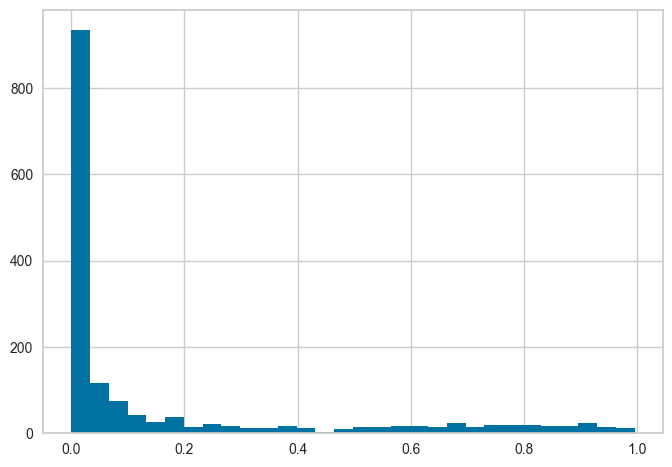

In [229]:
eda.histogram("instrumentalness",bins=30);

 If a feature has more higher or lower values, the distance between points in that feature space will tend to be larger, which can have the following effects on k-means clustering:
 - Greater influence on cluster assignment
 - More spread out clusters
 - More sensitive to scaling

If we analyze the data there is a distinction between songs that are live and not live and the people who listen to live songs on Spotify can be distinct group with unique listening preferences. By creating a binary categorical variable, we can capture this distinction more effectively and create a variable that is closely aligned with the concept of liveness.

In [230]:
p = Preprocessing(df)

In [231]:
p.rename("liveness","Live")
p.categorize("Live","50%");

0       1
1       1
2       1
3       1
4       1
       ..
1605    0
1606    1
1607    0
1608    0
1609    0
Name: Live, Length: 1610, dtype: category
Categories (2, int64): [0 < 1]


In [232]:
p.rename("instrumentalness","Instrumental")
p.categorize("Instrumental","75%");

0         1
1         1
2         1
3         0
4         0
       ... 
1605      0
1606      0
1607    NaN
1608      0
1609      0
Name: Instrumental, Length: 1610, dtype: category
Categories (2, int64): [0 < 1]


In [233]:
relevent_features = ["Live","acoustic_energy_bal","Instrumental","danceability","loudness","speechiness","tempo","valence","popularity","duration_ms"]

In [234]:
df = df[relevent_features]

In [235]:
df.isnull().sum()

Live                    1
acoustic_energy_bal     0
Instrumental           95
danceability            0
loudness                0
speechiness             0
tempo                   0
valence                 0
popularity              0
duration_ms             0
dtype: int64

In [236]:
p.impute("Instrumental",0)
p.impute("Live",0)

In [237]:
df.isna().sum()

Live                   0
acoustic_energy_bal    0
Instrumental           0
danceability           0
loudness               0
speechiness            0
tempo                  0
valence                0
popularity             0
duration_ms            0
dtype: int64

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 1609
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Live                 1610 non-null   category
 1   acoustic_energy_bal  1610 non-null   float64 
 2   Instrumental         1610 non-null   category
 3   danceability         1610 non-null   float64 
 4   loudness             1610 non-null   float64 
 5   speechiness          1610 non-null   float64 
 6   tempo                1610 non-null   float64 
 7   valence              1610 non-null   float64 
 8   popularity           1610 non-null   int64   
 9   duration_ms          1610 non-null   int64   
dtypes: category(2), float64(6), int64(2)
memory usage: 116.6 KB


----------------------------------------------------------------------------------------

EDA & Feature Engineering

In [239]:
eda = EDA(df)

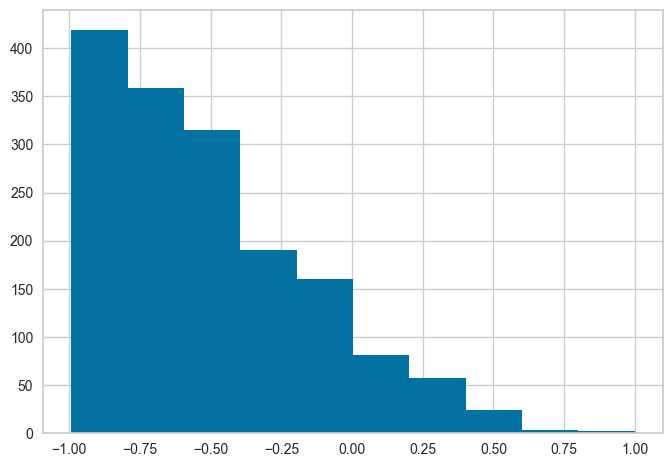

In [240]:
eda.histogram("acoustic_energy_bal");

In [241]:
df[df["Live"]==0]["popularity"].mean()

23.177639751552796

In [242]:
df[df["Live"]==1]["popularity"].mean()


18.398757763975155

- Non-Live songs are more Popular

In [243]:
df[df["Live"]==0]["loudness"].median()

-8.007

In [244]:
df[df["Live"]==1]["loudness"].median()

-5.711

- Live songs are more loud


In [245]:
df[df["Live"]==0]["acoustic_energy_bal"].mean()

-0.389107711843228

In [246]:
df[df["Live"]==1]["acoustic_energy_bal"].mean()


-0.6252358092104762

- Non-Live songs are more Acoustic but Live songs are more Energetic

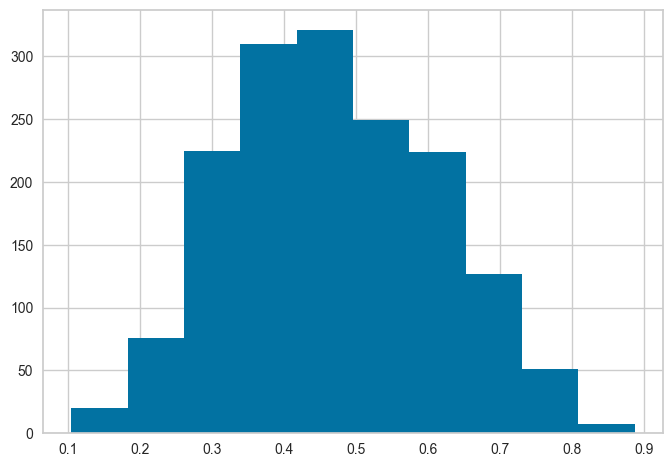

In [247]:
eda.histogram("danceability");

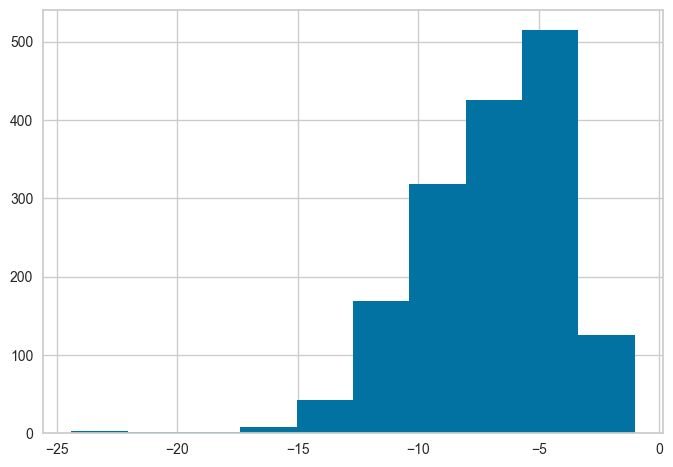

In [248]:
eda.histogram("loudness");

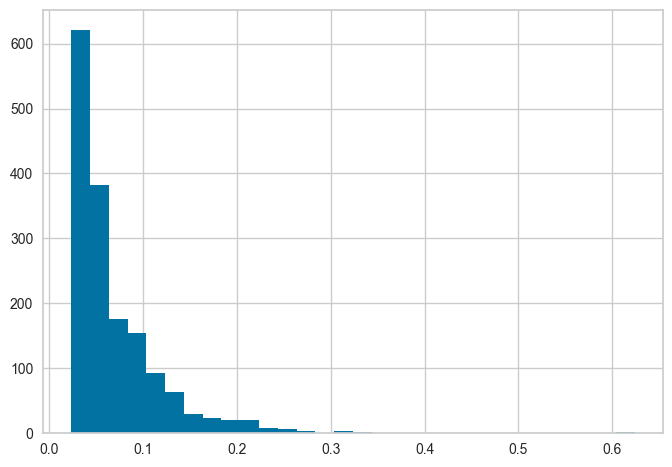

In [249]:
eda.histogram("speechiness",30);

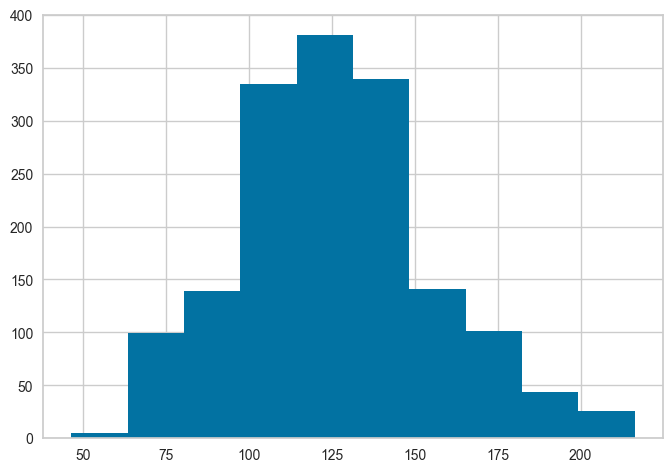

In [250]:
eda.histogram("tempo");

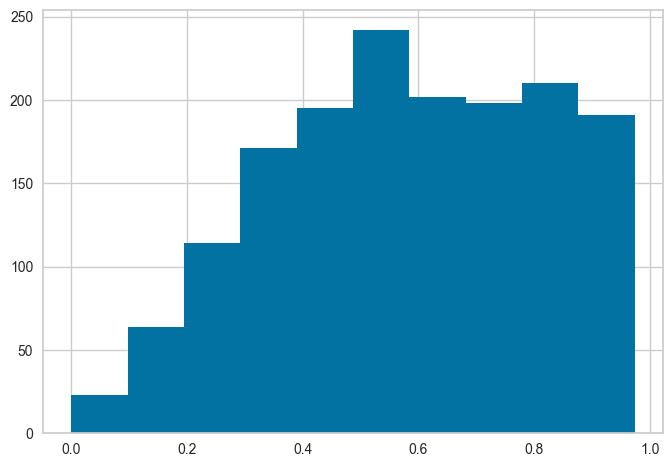

In [251]:
eda.histogram("valence");

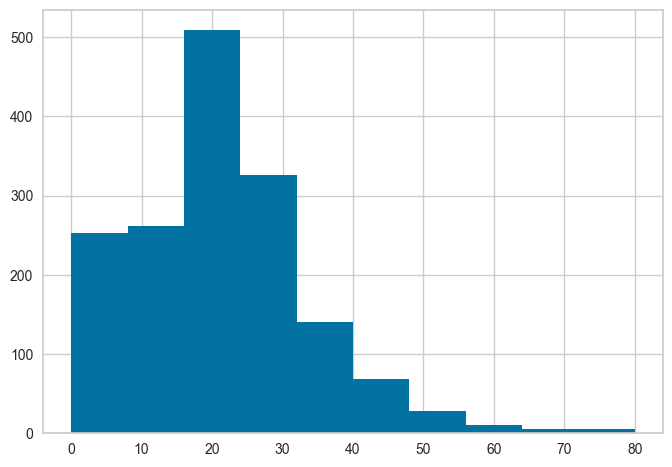

In [252]:
eda.histogram("popularity");

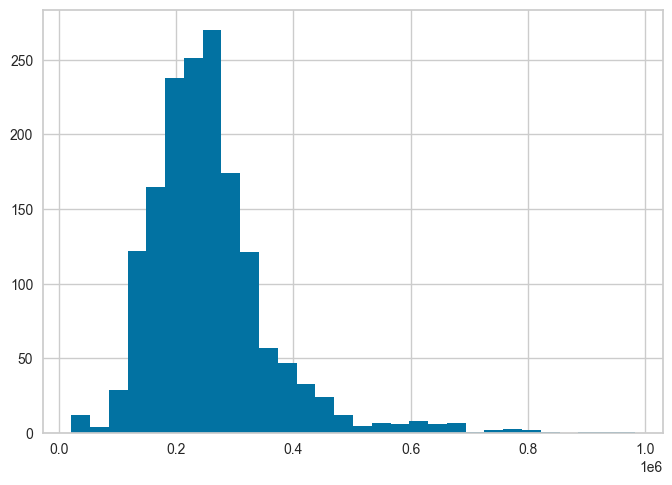

In [253]:
eda.histogram("duration_ms",30);

In [254]:
p = Preprocessing(df)

In [255]:
p.exp_transform("loudness") #has negative range converting to get range from 0-0.35 
p.log_transform("speechiness") #to get a Normal Distribution
p.log_transform("tempo") #has comparitively higher values converting to get range from 3.8-5.4
p.log_transform("duration_ms") #remove skewness and getting a range from 10-14

In [256]:
eda = EDA(df)

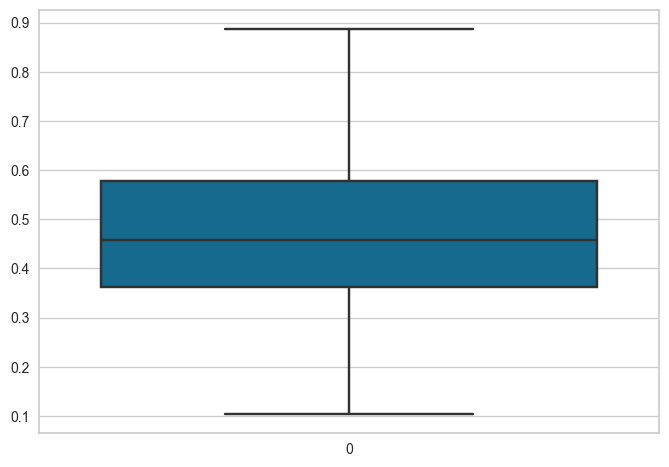

In [257]:
eda.boxplot("danceability");

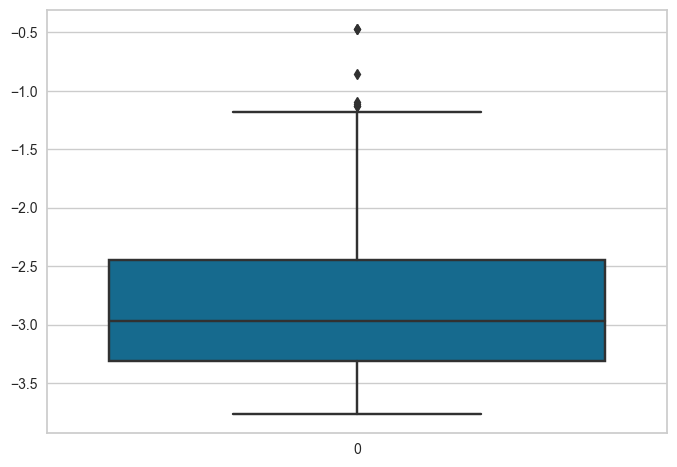

In [258]:
eda.boxplot("speechiness");

In [259]:
df = df[df["speechiness"]<-0.1]

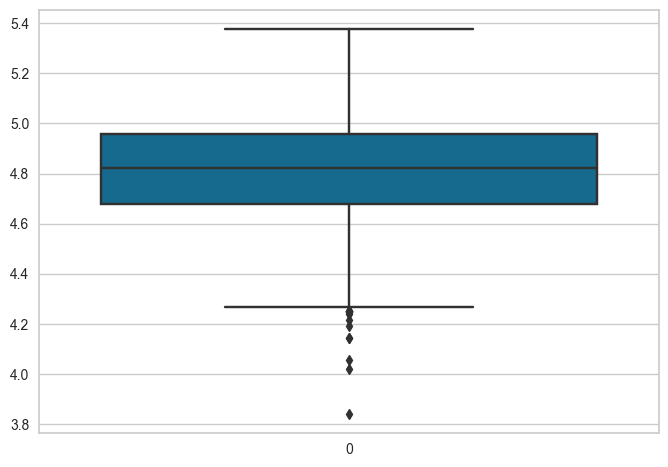

In [260]:
eda.boxplot("tempo");

In [261]:
df = df[df["tempo"]>4]

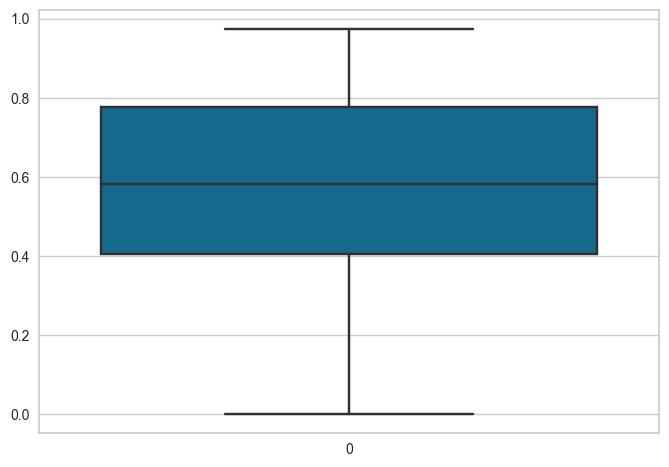

In [262]:
eda.boxplot("valence");

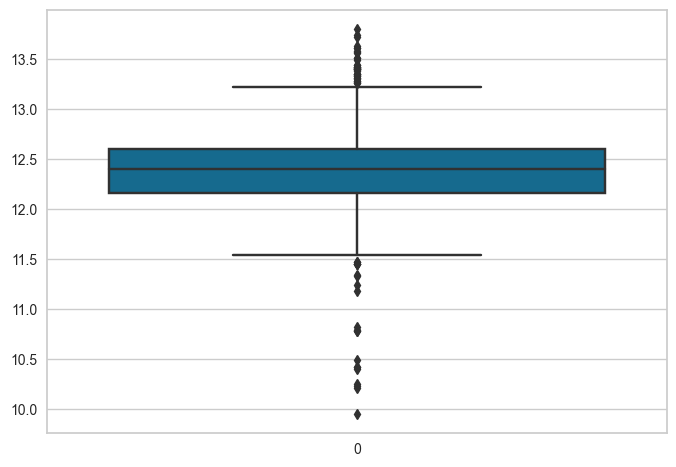

In [263]:
eda.boxplot("duration_ms");

In [264]:
# df = df[df["duration_ms"]>11]

In [265]:
df.shape

(1609, 10)

In [266]:
df.head()

,Live,acoustic_energy_bal,Instrumental,danceability,loudness,speechiness,tempo,valence,popularity,duration_ms
0,1,-0.910118,1,0.463,0.000002,-2.207275,4.770693,0.0302,33,10.792202
1,1,-0.520740,1,0.326,0.008205,-2.578339,4.878665,0.3180,34,12.441828
2,1,-0.546529,1,0.386,0.007183,-2.162823,4.868042,0.3130,34,12.480517
3,1,-0.413264,0,0.369,0.003946,-1.645065,4.890304,0.1470,32,12.630948
4,1,-0.562626,0,0.303,0.006109,-2.375156,4.871626,0.2060,32,12.628415


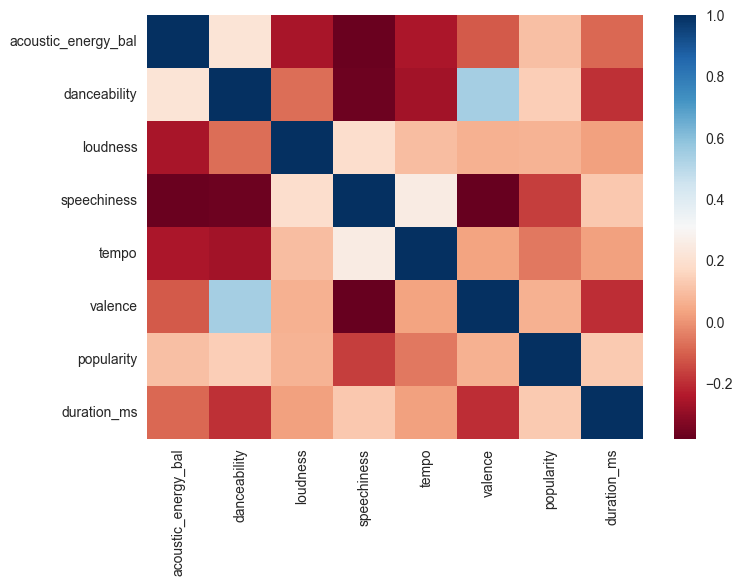

In [267]:
eda.heatmap();

In [268]:
from sklearn.preprocessing import MinMaxScaler
df = MinMaxScaler().fit_transform(df)

In [269]:
f = FeatureEngineering(df)

In [270]:
f.pca(5)

[0.27883122 0.18859253 0.06025792 0.04325399 0.02392544]


In [271]:
df = f.data

----------------------------------------------------------------------------------------

MODELLING

In [272]:
model = ModellingKMeans(df)

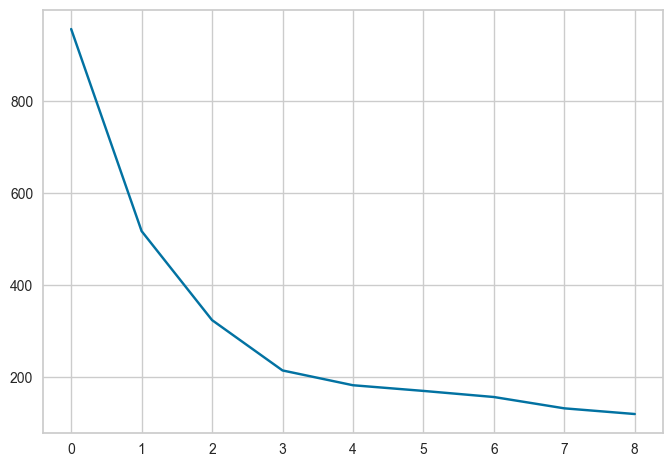

In [273]:
model.check_wcss();

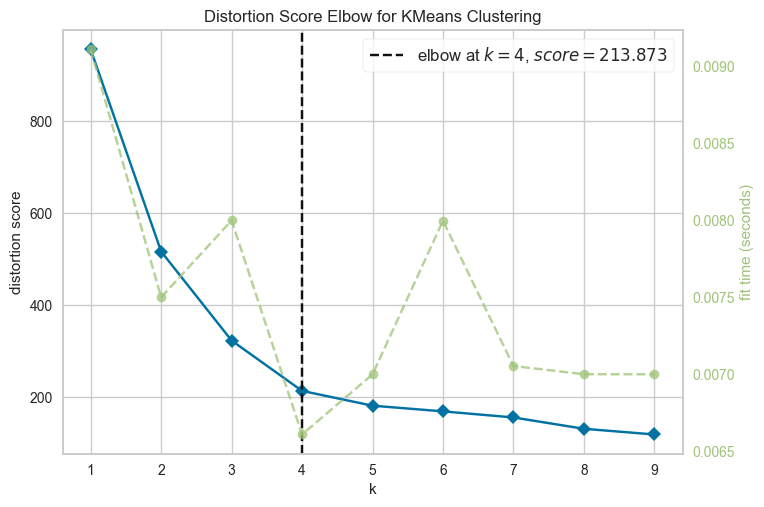

In [274]:
model.elbow_visualizer();

In [275]:
for i in range(3,8):
    model.finalize_model(i)

Silhuette score for kmeans model with 3 clusters using scaled data: 0.5170663447877529
Silhuette score for kmeans model with 4 clusters using scaled data: 0.5810143915698023
Silhuette score for kmeans model with 5 clusters using scaled data: 0.49372377183981475
Silhuette score for kmeans model with 6 clusters using scaled data: 0.46947729682408706
Silhuette score for kmeans model with 7 clusters using scaled data: 0.4438787483513009


In [276]:
final_model = model.finalize_model(4)

Silhuette score for kmeans model with 4 clusters using scaled data: 0.5810143915698023


Figure(800x550)


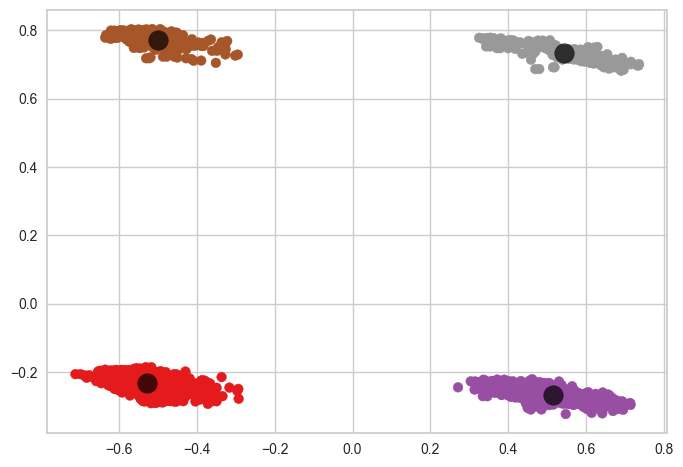

In [277]:
model.visualize_2d();

In [278]:
model.visualize_3d()

----------------------------------------------------------------------------------------

LABELLING

In [279]:
df = pd.DataFrame(df)
indices = df.index
df_filtered = data[data.index.isin(indices)]
print("Shape :"+ str(df_filtered.shape))

df_filtered["cohorts"] = final_model.predict(df)

df_filtered.head()

Shape :(1609, 17)


C:\Users\kushagra_sahu\AppData\Local\Temp\ipykernel_22256\2433946888.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,cohorts
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,3
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,3
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,3
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,1
4,Donâ€™t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,1


LABEL 0

In [280]:
#TOP SONG OF THE CATEGORY
df_filtered[df_filtered["cohorts"] == 0]["name"].mode()

0                                          All Sold Out
1                                      Back Street Girl
2                                      Bitch - 2009 Mix
3                                           Complicated
4                                            Connection
5                              Cool, Calm And Collected
6                         Gotta Get Away - Mono Version
7                               I'm Free - Mono Version
8                        Let's Spend The Night Together
9                                          My Obsession
10    Oh Baby (We Got A Good Thing Goin') - Remaster...
11                                       Please Go Home
12                      She Said Yeah - Remastered 2002
13                                   She Smiled Sweetly
14                                  Take It Or Leave It
15                                        Tumbling Dice
16                            Who's Been Sleeping Here?
17                               Wild Horses - 2

In [281]:
#TOP ALBUM OF THE CATEGORY
df_filtered[df_filtered["cohorts"] == 0]["album"].mode()[0]

'Some Girls (Deluxe Version)'

LABEL 1

In [282]:
#TOP SONG OF THE CATEGORY
df_filtered[df_filtered["cohorts"] == 1]["name"].mode()

0    Honky Tonk Women - Live
1       Tumbling Dice - Live
Name: name, dtype: object

In [283]:
#TOP ALBUM OF THE CATEGORY
df_filtered[df_filtered["cohorts"] == 1]["album"].mode()[0]

'Live Licks'

LABEL 2

In [284]:
#TOP SONG OF THE CATEGORY
df_filtered[df_filtered["cohorts"] == 2]["name"].mode()[0]

'Mercy Mercy - Remastered 2002'

In [285]:
#TOP ALBUM OF THE CATEGORY
df_filtered[df_filtered["cohorts"] == 2]["album"].mode()

0    Exile On Main Street (Bonus Track Version)
1         Exile On Main Street (Deluxe Version)
2                      Goats Head Soup (Deluxe)
3                               On Air (Deluxe)
4                   Some Girls (Deluxe Version)
Name: album, dtype: object

LABEL 3

In [286]:
#TOP SONG OF THE CATEGORY
df_filtered[df_filtered["cohorts"] == 3]["name"].mode()[0]

'Street Fighting Man - Live'

In [287]:
#TOP ALBUM OF THE CATEGORY
df_filtered[df_filtered["cohorts"] == 3]["album"].mode()[0]

'Tattoo You (Super Deluxe)'

----------------------------------------------------------------------------------------

CONCLUSION

- 0 - Acoustic Rock Enthusiasts - fans of thoughtful and introspective music that provides an emotional connection with the listener.
- 1 - Fans(Country/Blues) - Fans of specific bands or artists who incorporate country and blues influences into their music
- 2 - Instrumental Rock Enthusiasts - fans of music that uplifts their spirits and provides a sense of joy and positivity.
- 3 - Live Music Anthusiasts - individuals having a deep appreciation for the energy, spontaneity, and unique experiences that can only be found at live performances, and   are often dedicated fans of specific artists or genres of music.


In [288]:
label_map = {1:"Fans(Country/Blues)",2:"Instrumental Rock Enthusiasts",3:"Live Music Anthusiasts",0:"Acoustic Rock Enthusiasts"}

In [289]:
df_final = df_filtered.copy()
df_final["cohorts"] = df_final["cohorts"].map(label_map)

In [290]:
df_final.to_csv("songs with cohorts.csv")